# Introduction
In this project, we learned advanced regression techniques to predict the sale price of the houses given house attributes. For our experiments, we use the data from Kaggle house price competition https://www.kaggle.com/c/house-prices-advanced-regression-techniques. The data file consists of train dataset, test datset, and a text file having description of all features. This project gave us an opportunity to learn all aspects of predictive analytics including Exploratory data analysis, feature engineering, modeling and predictions.

From a buyer's perspective, we always thinks what are the key factors that drives the house prices? Why there is so much variablity in the prices of houses? Does old houses have higher price than the new ones? Some house have same living area and the same number of rooms, but have different prices just because of different locations. In this project, we explore the relationship between house attributes and house prices to answer some of these questions. 

## Goal
The goal of this project is to predict the sale price of a house given certain features of a house.

## Techniques Used
We use different imputation methods to handle missing values in the features. Additionally, we use three different regression models including Linear Regression, Random Forest, and Gradient Boosting for predicting sale price of house. We compare the predictions of all models on the basis of evaluation criteria given in the competition.

## Evaluation Criteria 
The evaluation criteria of this live kaggle competition is Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. We computed the RMSE on train dataset and submitted our predictions to get the RMSE on test dataset.

### Research Questions

1. Is there a correlation between different features and how the given features relate to the Sale price of a house?
2. What is the best regression technique to predict the sale price?
3. Do complext models such as tree based gradient boosting provide any advantage over simple linear models?
4. What are the most important features or most significant features used by model for predicting the sale price of house?
5. Does buyers preference matches with the important features used for predictions by the model?


# Implementation
We first import required libraries including Scikit-Learn, Pandas, Xgboost. Then, we read training and test data. The train data consists of $1460$ observations and $81$ features and test data consists of $1459$ observations and $80$ features. We noticed that test data does not contains the Saleprice column which is expected beacuse that is our target variable and we have to predict the sale price by modeling. The `Id` column is not a feature and used for indexing purpose. So we considered $79$ explanatory variables and $1$ target variable in our analysis.


In [79]:
# load required libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# load datasets
house_train = pd.read_csv("house/train.csv",header = 0)
house_test = pd.read_csv("house/test.csv",header = 0)

In [3]:
# check how train data looks
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check test data
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Most numerical feature names are self explantory like Lot area, Year built, Pool area, screenporch area, basement area, and Descrption of some of the features is as follows (thanks to data description text file):

1. MSSubClass: Identifies the type of dwelling involved in the sale which has different categories like single storey, double storey, split, duplex labeled as different classes like 20 for one storey and 190 for multilevel etc.
2. MSZoning: Identifies the general zoning classification of the sale like Agricultural(A), Commercial (C), residential medium density (RM), residential low density (RL)etc.
3. LotFrontage: Linear feet of street connected to property.
4. LotArea: Lot size in square feet.
5. Street: Type of road access to property classfied as paved or gravel.
6. Alley: Type of alley access to property classfied as paved or gravel.
7. Utilities: Classified on the basis of all type of electric,gas, water, septic tank utilities etc.
8. OverallQual : labeled on the scale of 0 to 10. 0 being bad and 10 being excellent.
9. Lotshape : classified as Regular or irregular.
10. LandContour: Flatness of the property categorised as banked, depressed, hill side.

For further description please refer the data description text file.


In [5]:
# check dimensions of data
print("Training data shape {}".format(house_train.shape))
print("Test data shape {}".format(house_test.shape))

Training data shape (1460, 81)
Test data shape (1459, 80)


In [70]:
# summary of train_data
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# summary of target variable
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

When we look at the summary of the train data we observed that there are only 38 columns in the matrix. We observed that there are some categorical features and the average, std deviation etc cannot be computed on categorical variables. The average sale price of house is $180921$ and the standard deviation is very high $79442$. We want to analyze why there is so much variance. But first, Lets check how many categorical and numerical features we have? 

In [10]:
# How many categorical and Numerical features in the dataset
categorical_features = house_train.select_dtypes(include=['object']).columns
numerical_features = house_train.select_dtypes(include=['int64','float64']).columns

cat = len(categorical_features)
num = len(numerical_features)-2 # 2 for Id and SalePrice column

print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 36 numerical = 79 features


We have total $79$ explanatory features excluding ID and Target variable further analysis. Now, we have features and we know what to predict and what techniques should be used. Let's fit a reggression model which predicts the house price on the basis of the given features. But in first look of train and test data we observed that there are so many NA and missing values in our both datasets. We cannot train a model with so many Na values. So first we need to get rid of thes NA values. 

## Data Cleaning

1. What to do with so many NA/Missing values?? 

First step and the easiest way to handle these NA values is to drop the rows which contains missing values. 

In [11]:
# lets get rid off data with missing values to train our model
train_na = house_train.dropna()
train_na # surprise not even a single row in train with complete data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


So, we go through this and surprised by the fact that not even a single observation in our train data has all the features. Then we check for test data beacuse even if we handle the missing values in train data and test our model on test data, it will predict wrong. So we dropped the missing/NA values of the test dataset. This is going to be interesting  and we try to seek the answers of some more questions.

2. Is there any kind of pattern in the missing values in train data and test data?
3. What are the features which has more missing values?
4. How is it possible that there is not even a single row in our both datasets which has all the features which will be used for prediction?

In [501]:
test_na = house_test.dropna()
test_na  # surprise not even a single row with complete data how can we predict 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [12]:
# check how many missing values in train data
Total_Na_train = house_train.isnull().sum()
print("Total_Na_train", Total_Na_train.sum())
# Variables with most missing values - top 20
Total_Na_train.sort_values(ascending=False)[:20]

Total_Na_train 6965


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [419]:
# check for top 20 variables with missing values in test dataset 
Total_Na_test = house_test.isnull().sum()
print("Total_Na_test", Total_Na_test.sum())
Total_Na_test.sort_values(ascending=False)[:20]

Total_Na_test 7000


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

There are total $6965$ and $7000$ Missing/Na features in train and test data set respectively. We sorted the features in an order which has most NA values. We noticed that features like PoolQC has the most missing values and some other features like MiscFeature, Alley, Fence has more than 1000 missing, FireplaceQu, LotFrontage, GarageCond, GarageQual, GarageYrBlt also have more missing values in train and test datasets. So we thought to drop these features but we don't know how these are related to the sale price. So, we did some correlation analysis on the train dataset to understand data in more better way. 

# Exploratory data analysis: Feature Visualization

We started our visualization from the density distribution of our target variable Saleprice. We thought to choose some random features for further visualization. But, then we realized that we can find some interesting features for plots in our correlation analysis. 

Text(0.5, 0, 'Sale Price')

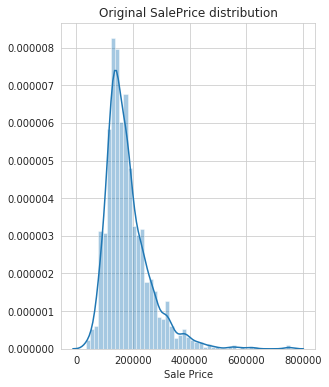

In [133]:

# density plot of target variable - Saleprice
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(house_train["SalePrice"])
plt.title('Original SalePrice distribution')
plt.xlabel('Sale Price')


We observed that the ditribtion of sale price is postively skewed so we transformed the target variable it by taking natural log and plot the distribution again.

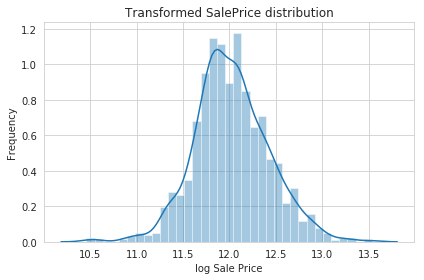

In [130]:
# Log transformation of Sale price - Normal distribution
log_y = np.log(house_train["SalePrice"])
sns.distplot(log_y)
plt.ylabel('Frequency')
plt.xlabel('log Sale Price')
plt.title('Transformed SalePrice distribution')
plt.tight_layout()
plt.savefig("saleprice.png")

We observed that the distribution is normal and realized why the evaluation criteria is RMSE between log of observed and predicted value. Because, taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.
 
We plotted a heat map of correlation matrix to understand the relationship between features. 


In [134]:
corr = house_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Boom! We got a large correlation matrix of all the variables correlated psitively and negatively to each other. Darker cells are strongly correlated like `Garageyr` built is highly corelated to `year built` with a coefficeient of $0.83$ which is expected because both may be built on same year. Similarly, `Garege area` and `GarageCars`are strongly correlated with coefficeintb of $0.88$ which is expected as more garage area means more car capacity.
But, we are more interested towards the features that are strongly correlated to the saleprice. So we extracted that information from this large matrix by choosing variables which has moderate or strong, positive or negative correlation with saleprice.


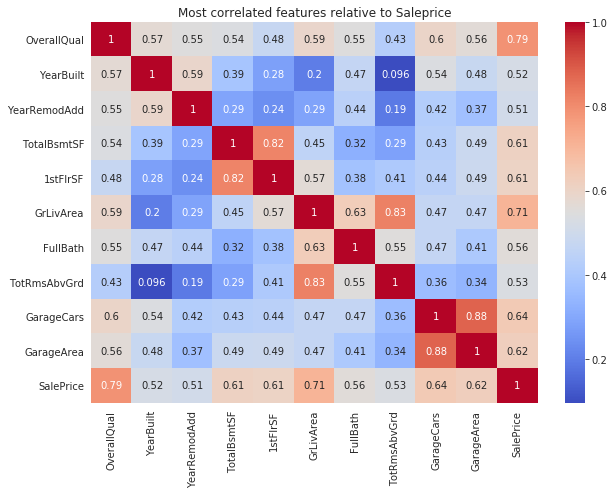

In [135]:
# Most correlated to the saleprice
top_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,7))
g = sns.heatmap(house_train[top_corr_features].corr(),annot=True,cmap='coolwarm')
g.set_title("Most correlated features relative to Saleprice")
plt.savefig("corr_mat.png")

We got `top 10` correlated features to the Saleprice and noticed that the overall Quality of the house is the most correlated to the Saleprice with coefficient of $0.79$ 

For further visualization, we ploted some more graphs of these correlated features to understand how these are related to the saleprice.

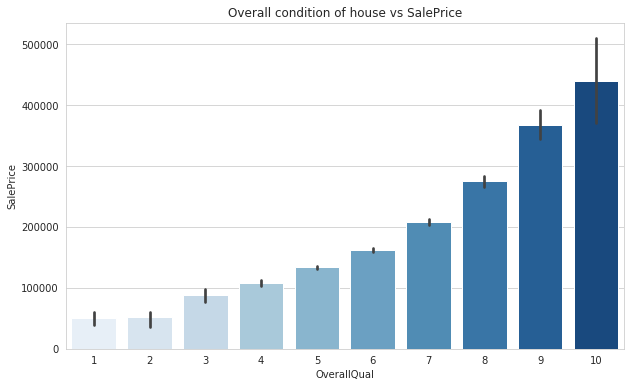

In [136]:
# overall quality vs saleprice
plt.figure(figsize=(10,6))
overqual = sns.barplot(x="OverallQual", y="SalePrice", 
                       palette = "Blues",data = house_train)
overqual.set_title("Overall condition of house vs SalePrice")
plt.savefig("overallqual.png")

We observed that as the overall quality of the house is improved from `bad` to `excellent` the saleprice increases.

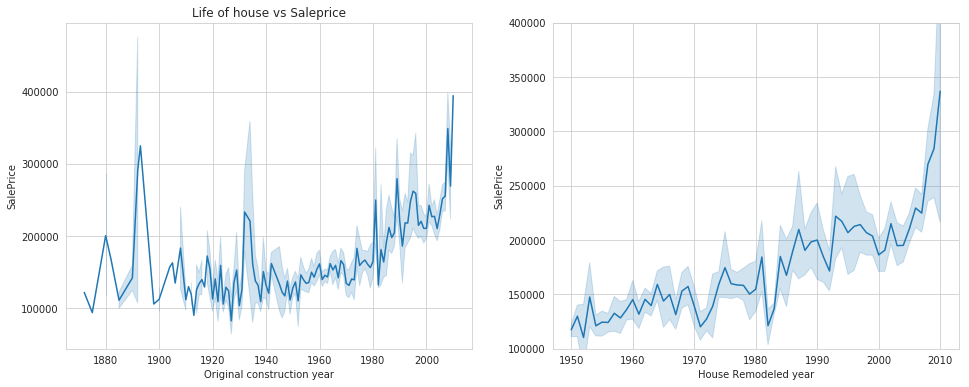

In [204]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
Yr_built = sns.lineplot(x="YearBuilt", y="SalePrice", data = house_train)
Yr_built.set(xlabel='Original construction year', ylabel='SalePrice')
plt.title("Life of house vs Saleprice")
plt.subplot(1,2,2)
Yr_remod = sns.lineplot(x="YearRemodAdd", y="SalePrice", data = house_train)
Yr_remod.set(xlabel='House Remodeled year', ylabel='SalePrice')
Yr_remod.set_ylim(100000, 400000)
plt.savefig("Year.png")

The plot shows that the old houses has lower price than the new houses. The newly constructed and remodeled house has more saleprice, This may be because the life of the building is more for new houses. 

Let's explore the relation of few more variables like Total Rooms above garden, Garden living area and No. of full bath with the saleprice by some plots.

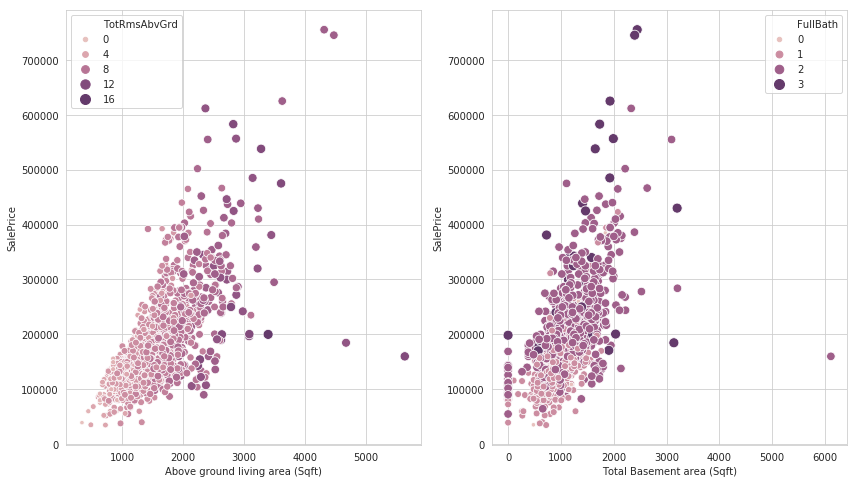

In [139]:
# Year built and remodeled vs Saleprice
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
Gr_Liv_area= sns.scatterplot(x="GrLivArea", y="SalePrice", 
                             hue = "TotRmsAbvGrd",
                           palette=cmap, sizes=(20, 100),
                          size = "TotRmsAbvGrd", data = house_train)
Gr_Liv_area.set(xlabel='Above ground living area (Sqft)', ylabel='SalePrice')

plt.subplot(1,2,2)

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
Bsmt_area= sns.scatterplot(x="TotalBsmtSF", y="SalePrice", hue = "FullBath",
                           palette=cmap, sizes=(20, 100),
                          size = "FullBath", data = house_train)
Bsmt_area.set(xlabel='Total Basement area (Sqft)', ylabel='SalePrice')
plt.savefig("Livarea_plot.png")

From the above plots it is clear that as the total basement area and above groound living area increases the saleprice of the house increases too.
Also, among the large area if the number of bedrooms and bathrooms are more then these houses has the more sale price. 

Few outliers are also observed like two points in first graph has more than 4000 area and number of rooms are more but still have less price this may be due to some other feature like the overall condition may be bad for living or the house if too old.

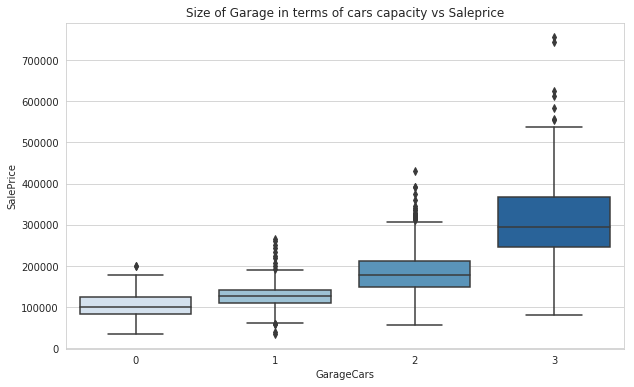

In [140]:
# GarageCars vs Saleprice
plt.figure(figsize=(10,6))
grg = house_train.drop(house_train[(house_train['GarageCars']>3) 
                         & (house_train['SalePrice']<300000)].index).reset_index(drop=True)
sns.boxplot(x='GarageCars', y='SalePrice',
            palette = "Blues",data = grg)
plt.title("Size of Garage in terms of cars capacity vs Saleprice")
plt.savefig("Garage.png")

Attention Buyers, If you need a house with more garage capacity then you have to pay more!



## Feature Engineering : 
### Step 1

Now, we know what are the important features relative to saleprice. Let's fit a model that can predict the saleprice.
But, wait, we have lots of missing values and we cannot drop all of them. So, how can we do modelling, we should do something to handle these missing values. 

So,we though to replace all the missing and NA values with the mean. For this we combined our train and test data to perform this task so that we got rid of all NA in both datasets. Now, we have $2919$ observations and $80$ columns in our combined dataset. Also, there are $43$ categorical features in our data for which we need to create dummy variables before training our model.

In [141]:
# combine both datasets for pre-processing excluding target variable "saleprice"
ntrain = len(house_train)
ntest = len(house_test)
all_data = pd.concat((house_train.loc[:,'Id':'SaleCondition'],
                      house_test.loc[:,'Id':'SaleCondition']))

In [142]:
print("All data shape {}".format(all_data.shape))

All data shape (2919, 80)


In [148]:
#creating dummy variables for categorical data
all_data = pd.get_dummies(all_data)
print("All data shape {}".format(all_data.shape))
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
Total_Na_all_data = all_data.isnull().sum()
print("Total Na values in all_data:", Total_Na_all_data.sum())

All data shape (2919, 289)
Total Na values in all_data: 0


All NA values are replaced by mean and now we have all clean data to train models and to predict the sale price.

## Modeling

Now, we have a combined clean dataset with all missing or NA values replaced by mean and we created dummy variables for all the categorcal variables. Now we have total $289$ features. 

Let's start with simple model.

### First model: Linear regression 

In [149]:
# split train and test data from cleaned and combimed all data
# no.of rows in train data 1460
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
Y_train = house_train['SalePrice']

In [153]:
# Fit simple linear regression model on train data
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train,Y_train)
lin_reg_1.score(X_train,Y_train)

0.9332973931247593

In [154]:
# lin reg on train data
y_pred_tr = lin_reg_1.predict(X_train)
print("Root Mean squared error on train data: %.2f"
      % np.sqrt(mean_squared_error(np.log(Y_train), np.log(y_pred_tr))))

Root Mean squared error on train data: 0.11


We fitted our first linear regression model. The correlation coefficient is $0.93$ and RMSE is $0.11$. Let's predict the sale price of our test data.

In [164]:
# prediction on test data and save predictions for submissions.
y_pred = lin_reg_1.predict(X_test)
house_test['y_pred_lr_1'] = y_pred_lr
house_test[['Id','y_pred_lr_1']].to_csv('submission_lr.csv', 
                                        header=['Id','SalePrice'], index=False)

We submitted our predicted saleprices to the competition and got to know that RMSE on test data is $0.20$. which is higher than the train data. 

We are not satisfied by the performance of our first model. And though because of heavy bias the linear model does not fits so well on data. So, we trained a complex model `Random forest` with $500$ trees on the same dataset. 

### Second model : Random Forest

In [161]:
# Random forest model fit on train data with 500 trees
RF = RandomForestRegressor(n_estimators=500, n_jobs=-1)
RF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [162]:
y_pred_RF_train = RF.predict(X_train)
print("Root Mean squared error on train data: %.2f"
      % np.sqrt(mean_squared_error(np.log(Y_train), np.log(y_pred_RF_train))))

Root Mean squared error on train data: 0.06


In [163]:
# predictions on test data
y_pred_RF = RF.predict(X_test)
house_test['y_pred_RF'] = y_pred_lr
house_test[['Id','y_pred_RF']].to_csv('submission_rf.csv', header=['Id','SalePrice'], index=False)

The RMSE on the train dataset is reduced to $0.06$ and when we submitted our predictions the RMSE on test dataset reduced to $0.14$ and we jumped to $978$ places on the leaderboard of the competition. 

We want to reduce the error and thought that replacing all NA/missing values with mean might not be a good strategy to handle these NA values. We should handle them in some other smart and better way to improve the performance of our models.

## Feature Engineering 
### Step 2

We realized that to handle these NA values, first we need to dive deep into the data description to understand why these values are missing at the first place. From there we understands that `NA` in most features does not mean missing value. Actually, in data description it is given that the NA for most feature means that particular feature is not available in that house. That's seems interesting because it is a possible case that not all houses may have all the listed features. Which means that top features with NA values `PoolQc`,`Alley`,`Fence`,`MiscFeature`,`FireplaceQu`,`LotFrontage` are not present in most houses. Also, we noticed that these features are not even moderately correlated to the `saleprice`.(Remember from Heat map of top most correlated features to target variable).

So, In order to process our data, we decided to drop these six features.  As there are `more than $10\%$ values missing or we can say that most houses does not have these Alley, Fence, Pool, Fireplace thats why these features are NA in dataset.`

We start processing on the combined dataset. Now our dataset has $2919$ rows and $74$ remaining features.

After dropping these six features we impute the NA values with $0$ in all numerical features and `None` in all  categorical features with the help of data description. Like, if there is no basement in the house then all the correlated features like Basement finished and unfinished area, basement condition , basement quality and number of bathrooms etc. (`BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath`)  will also not available so we replaced all these with Zero or none. 

Similarly, NA in Garage correlated features like 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',GarageYrBlt', 'GarageArea', 'GarageCars'means there is `no garage facility in those houses thus NA is replaced by None or 0.`

Rest of the variables have very few missing/NA values so we replaced those features with the most frequent ones. Like, most of the houses have typica/average Kitchen Quality, Utilities , Electrical etc.

In [167]:
# Feature Engineering
# combine train and test data for processing
Combined_data = pd.concat((house_train.loc[:,'Id':'SaleCondition'],
                      house_test.loc[:,'Id':'SaleCondition']))
# drop 6 columns which has more than 10% NA values 
processed_data = Combined_data.drop(["PoolQC","MiscFeature",
                                     "Alley","Fence","FireplaceQu",
                                     "LotFrontage"], axis = 1)
print("Processed data shape {}".format(processed_data.shape))

# Impute missing values in remaining columns 
# Since if there is no garage or basement in the house then their 
#related features will be missing.
# So, assuming the Na means no garage and basement present, replace 
# garage and basement related categorical variables with "None" and 
# numerical variables with "0"

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    processed_data[col] = processed_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    processed_data[col] = processed_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath'):
    processed_data[col] = processed_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2'):
    processed_data[col] = processed_data[col].fillna('None')
    
# Na in MasVnrType and MasVnrArea most likely means that there is no 
# Mason veneer in these houses
processed_data["MasVnrType"] = processed_data["MasVnrType"].fillna("None")
processed_data["MasVnrArea"] =processed_data["MasVnrArea"].fillna(0)
processed_data['MSSubClass'] = processed_data['MSSubClass'].fillna("None")

# As per data description following values are typical average unless
#stated so we considered the same
processed_data["Functional"] = processed_data["Functional"].fillna("Typ")
processed_data['KitchenQual'] = processed_data['KitchenQual'].fillna("TA")

# Replace all other variables have very missing values so filling it 
#with most frequent values used for it
processed_data['MSZoning'] = processed_data['MSZoning'].fillna(
    processed_data['MSZoning'].mode()[0])
processed_data['Electrical'] = processed_data['Electrical'].fillna(
    processed_data['Electrical'].mode()[0])
processed_data['Exterior1st'] = processed_data['Exterior1st'].fillna(
    processed_data['Exterior1st'].mode()[0])
processed_data['Exterior2nd'] = processed_data['Exterior2nd'].fillna(
    processed_data['Exterior2nd'].mode()[0])
processed_data['Utilities'] = processed_data['Utilities'].fillna(
    processed_data['Utilities'].mode()[0])
processed_data['SaleType'] = processed_data['SaleType'].fillna(
    processed_data['SaleType'].mode()[0])

# Check for Na values in processed data:
Total_Na_processed_data = processed_data.isnull().sum()
print("Total Na values in processed_data:", Total_Na_processed_data.sum())

Processed data shape (2919, 74)
Total Na values in processed_data: 0


The processed dataset does not have any missing or NA values do we can do modeling on this dataset. Let's have a look on our processed data.


In [174]:
processed_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


We noticed that MSSubclass has mean of $57$ and Year Built has a mean of $1971$ but, that doesn't make any sense. Because, the MSsubclass id the categories of the dwelling units. So we need to Encode the labels of all categorical variables and ordered numerical variables like year built, month sold etc. before modeling. We used LabelEncoder package for one hot encoding to give meaningful labels in specific order.

In [178]:
# Label encodding for categorical variables
cols = ( 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual', 
        'BsmtFinType1', 'BsmtFinType2', 'Functional',  'BsmtExposure',
        'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 
        'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
#Process columns and apply LabelEncoder to categorical features
for c in cols:
    label = LabelEncoder() 
    label.fit(list(processed_data[c].values)) 
    processed_data[c] = label.transform(list(processed_data[c].values))


In [181]:
# Create dummy variables to the processed categorical features for modeling
processed_data =  pd.get_dummies(processed_data)
# let's check how many dummy variables are created and how our data looks now
print("Processed and labeled data shape {}".format(processed_data.shape))
processed_data.head()

Processed and labeled data shape (2919, 213)


,Id,MSSubClass,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,5,8450,1,3,0,7,4,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,0,9600,1,3,0,6,7,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,5,11250,1,0,0,7,4,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,4,6,9550,1,0,0,7,4,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,5,5,14260,1,0,0,8,4,2000,2000,...,0,0,0,1,0,0,0,0,1,0


The processed and labeled encoded features has $213$ features including dummy variables. So, now our data is ready for modeling. Let's start predictions from our processed data.

### Modeling 

In first phase, we trained our modeled on the dataset in which we replaced all the missing and Na values by Mean. Let's fit some regression models to our processed datasets. First, we splitted our combined processed dataset into train and test then trained our models.

### Third Model : Linear Regression on processed dataset

In [27]:
# split combined processed data into train and test for modelling
x_train = processed_data[:ntrain].drop(['Id'],axis = 1)
x_test = processed_data[ntrain:].drop(['Id'],axis = 1)
y_train = house_train['SalePrice']

In [183]:
# Train Linear Regression model on processed data
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_train,y_train)
lin_reg_2.score(x_train,y_train)

0.91884295883229

The Linear regression does not fit better than previous one As the score for our previous model was $.93$ and this one has $0.91$. Let's check the RMSE and predictions of this model.

In [187]:
# prediction on train dataset
y_pred_train = lin_reg_2.predict(x_train)
# Check RMSE train datset
print("Root Mean squared error of linear model on train data: %.2f"
      % np.sqrt(mean_squared_error(np.log(y_train), np.log(y_pred_train))))
# prediction on test dataset
y_pred_lr_2 = lin_reg_2.predict(x_test)
# save predictions for submission
house_test['y_pred_lr_2'] = y_pred_lr_2
house_test[['Id','y_pred_lr_2']].to_csv('submission_3.csv', 
                                        header=['Id','SalePrice'], index=False)

Root Mean squared error of linear model on train data: 0.12


The RMSE on train dataset is greater than our previous two models. This means that our model is not performing better than previous models. Still we submitted the predicted values but as expected the RMSE is much higher than previous ones. This may be due to high bias of simple linear regression model. Let's train some complex model like Random Forest.

### Fourth Model: Random Forest 

In [188]:
## second Random Forest 
RF2_model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
RF2_model.fit(x_train,y_train)
RF2_model.score(x_train,y_train)

0.982061880871537

In [189]:
# Predict on train data
y_pred_train_RF2 = RF2_model.predict(x_train)
print("Root Mean squared error on train data: %.2f"
      % np.sqrt(mean_squared_error(np.log(y_train), np.log(y_pred_train_RF2))))
# Predict on test data and save predictions
y_pred_RF2 = RF2_model.predict(x_test)
house_test['y_pred_rf2'] = y_pred_lr
house_test[['Id','y_pred_rf2']].to_csv('submission_rf_clean.csv', 
                                       header=['Id','SalePrice'], index=False)

Root Mean squared error on train data: 0.06


The random forest model score is $0.98$ which shows better fit than previous ones.  RMSE on trained dataset is reduced to $0.06$ and on submission of our predictions to Kaggle the RMSE of our test dataset is $0.146$ which is slightly less than our previous Random forest model.

For better predictions we moved to gradient boosting technique and used Gradient Boosting decision tree model using `xgboost package`.
We trained a gradient boosting model with same features and it seems that RMSE reduced from $0.146$ to $0.136$. For further improvement we transformed our target variable taking natural log and trained our model.


## Final Model (Gradient Boosting)

In [199]:
import xgboost as xgb

# Gradient Boosting 
log_train_y = np.log(y_train)

dtrain = xgb.DMatrix(x_train, label = log_train_y)
dtest = xgb.DMatrix(x_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [200]:
# Fit xgboost model
model_xgb = xgb.XGBRegressor(n_estimators=1000, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(x_train, log_train_y)

# predictions
xgb_preds = np.exp(model_xgb.predict(x_test))
solution = pd.DataFrame({"Id":house_test['Id'], "SalePrice":xgb_preds})
solution.to_csv("xgb_final_sub.csv", index = False)

[21:04:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


The RMSE of our last model further reduced to $0.134$ from $0.136$ which is the least among all the other models. Also, we improved our ranking on leaderboard by $735$ places and are among top $49\%$.

Let's look at the most important features according to our final model. We created a dataframe which has all the features and their importances. We sorted the features on the basis of most important and plotted a bar graph of 20 most important features.

In [201]:
# Saving model results
results=pd.DataFrame()
results['Features']=x_train.columns
results['Importance'] = model_xgb.feature_importances_
results.sort_values(by='Importance',ascending=False,inplace=True)
# 20 Most important features in prediction
top_20 = results[:20]
top_20

,Features,Importance
57,MSZoning_RM,0.117151
39,GarageCars,0.107149
56,MSZoning_RL,0.056567
191,GarageType_Attchd,0.050008
20,TotalBsmtSF,0.049151
26,GrLivArea,0.048964
5,OverallQual,0.044543
8,YearRemodAdd,0.035105
7,YearBuilt,0.023643
36,Fireplaces,0.023083


Text(0.5, 1.0, 'Top 20 important features')

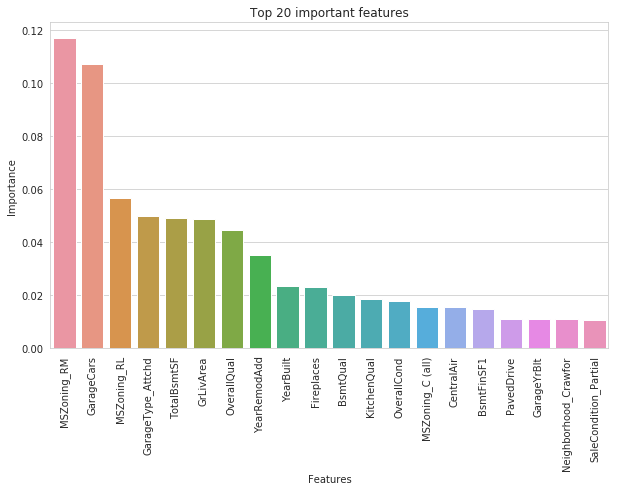

In [202]:
# Plot feature importance
plt.figure(figsize=(10,6))
Features_xgb = sns.barplot(x="Features", y="Importance",data =top_20)
plt.xticks(rotation=90)
Features_xgb.set_title("Top 20 important features")


From this plot we observed that the `MSZoning_RM` means Residential zone with medium density are the most important feature followed by `Garagecars` and others. It is interesting that the `GrLivArea`(Ground living area) and `Overall Quality` are less important features in prediction than `MSZoning` which were most correlated to the saleprice in our correlation matrix. Also, `TotalBsmtSF` (Total basement area in square feet) has more importance in predictions than the Overall Quality of house and `GrLivArea`.


# Conclusion

In this project, we build a model to predict house price using given house attributes. We explored different ways to handle missing data, and varying complexity models for prediction. Finally, to test our model, we submitted our prediction on kaggle and obtained $0.13$ RMSE score on Kaggle Leaderboard. Following is a summary of our analysis: 

- From all the correlated features Garage cars, Living area and Basement area plays important role in predicting house prices than overall Quality which was the most correlated to the sale price.
- MSZoning density was not among the top correlated feature to the saleprice but turned out to be most important feature by the model for saleprice prediction.
- Quality (Overall Quality of house, Basement Quality, Kitcehn Quality) and age of house are important features in terms of predicting house prices the features Year Built, Year Remodelled and garage year built are important for prediction.
- Increasing model complexity helps in improving model's predictive performance. Random Forest is more complex model  than simple linear regression model and performed better than it. 
- As expected, gradient boosting helps in further improving performance as it tries to learn from model errors. We find that among the 3 models that we tried, gradient boosting performed the best.
- Feature Engineering and better understanding of data is still an important part in modeling to improve the performance. In particular, a better understanding of features helps in replacing the NA values.
- Since, in most of the Kaggle competitions we observe that ensemble learning beats any single model, we expect better performace from ensemble models. 

